In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


class SMAbacktester():
    def __init__(self, symbol,SMA_S,SMA_L,start,end):
        self.symbol=symbol
        self.SMA_S=SMA_S
        self.SMA_L=SMA_L
        self.start=start
        self.end=end
        self.results=None
        self.get_data()
    
    def get_data(self):
        df=yf.download(self.symbol,start=self.start,end=self.end)
        data=df.Close.to_frame()
        data["returns"]=np.log(data.Close.div(data.Close.shift(1)))
        data["SMA_S"]=data.Close.rolling(self.SMA_S).mean()
        data["SMA_L"]=data.Close.rolling(self.SMA_L).mean()
        data.dropna(inplace=True)
        self.data2=data
        
        return data
    
    def test_results(self):
        data=self.data2.copy().dropna()
        data["position"]=np.where(data["SMA_S"]>data["SMA_L"],1,-1)
        data["strategy"]=data["returns"]*data.position.shift(1)
        data.dropna(inplace=True)
        data["returnsbh"]=data["returns"].cumsum().apply(np.exp)
        data["returnsstrategy"]=data["strategy"].cumsum().apply(np.exp)
        perf=data["returnsstrategy"].iloc[-1]
        outperf=perf-data["returnsbh"].iloc[-1]
        self.results=data
        
        ret=np.exp(data["strategy"].sum())
        std=data["strategy"].std()*np.sqrt(252)
        
        #return ret,std
        return round(perf,6), round(outperf,6)
    
    def plot_results(self):
        if self.results is None:
            print("Run the test please")
            
        else:
            title="{}| SMA_S={} | SMA_L={}".format(self.symbol,self.SMA_S,self.SMA_L)
            self.results[["returnsbh","returnsstrategy"]].plot(title=title, figsize=(12,8))

In [3]:
tester = SMAbacktester("SPY",50,100,"2000-01-01","2023-01-01")


[*********************100%%**********************]  1 of 1 completed


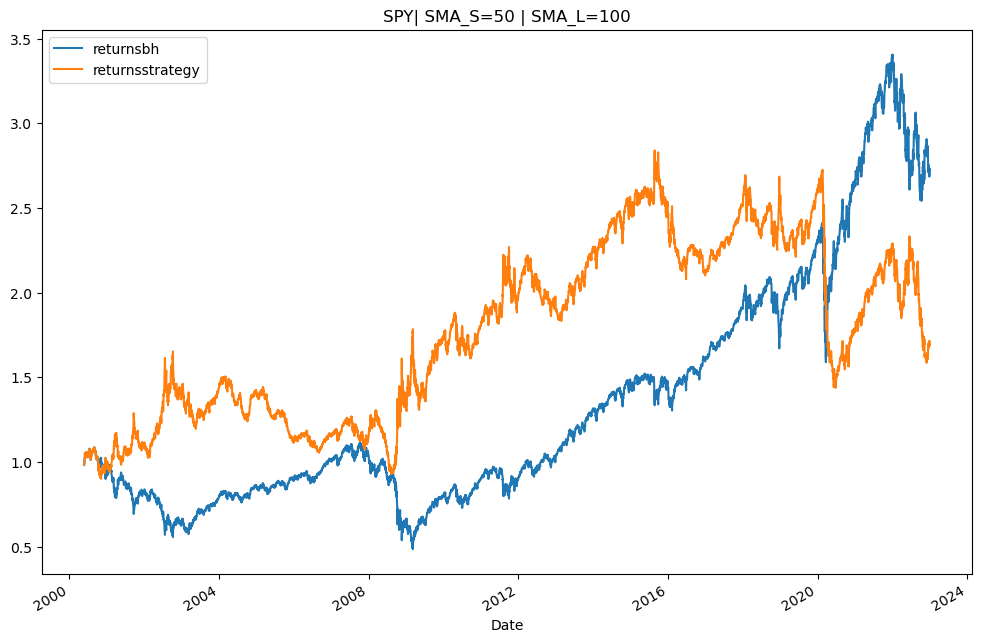

In [4]:
tester.test_results()
tester.plot_results()

[*********************100%%**********************]  1 of 1 completed


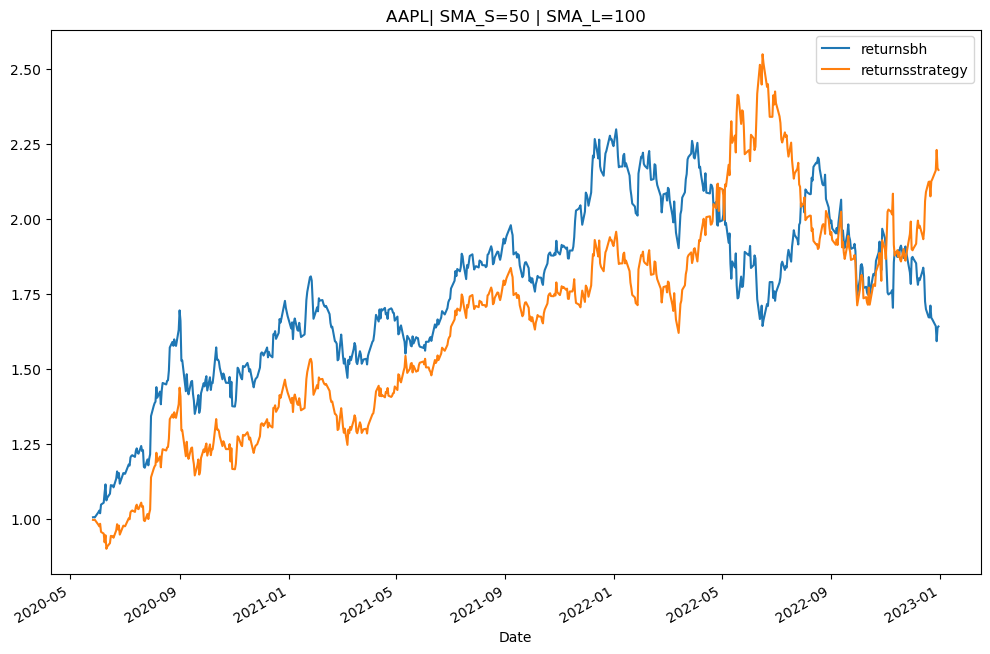

In [9]:
tester = SMAbacktester("AAPL",50,100,"2020-01-01","2023-01-01")
tester.test_results()
tester.plot_results()

[*********************100%%**********************]  1 of 1 completed


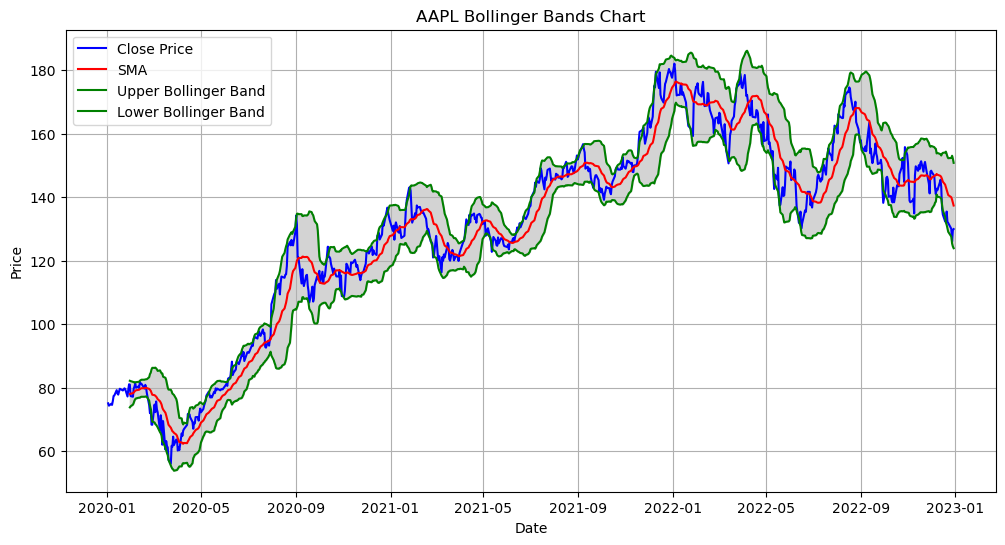

In [13]:
stock_symbol = "AAPL"  # Change this to the stock symbol you want to analyze
start_date = "2020-01-01"
end_date = "2023-01-01"

# Download historical stock price data using yfinance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate Bollinger Bands
window = 20
stock_data['SMA'] = stock_data['Close'].rolling(window=window).mean()
stock_data['STD'] = stock_data['Close'].rolling(window=window).std()
stock_data['Upper'] = stock_data['SMA'] + (2 * stock_data['STD'])
stock_data['Lower'] = stock_data['SMA'] - (2 * stock_data['STD'])

# Plot the Bollinger Bands chart
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='blue')
plt.plot(stock_data.index, stock_data['SMA'], label='SMA', color='red')
plt.plot(stock_data.index, stock_data['Upper'], label='Upper Bollinger Band', color='green')
plt.plot(stock_data.index, stock_data['Lower'], label='Lower Bollinger Band', color='green')
plt.fill_between(stock_data.index, stock_data['Lower'], stock_data['Upper'], color='lightgray')

plt.title(f'{stock_symbol} Bollinger Bands Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()

plt.show()

[*********************100%%**********************]  1 of 1 completed


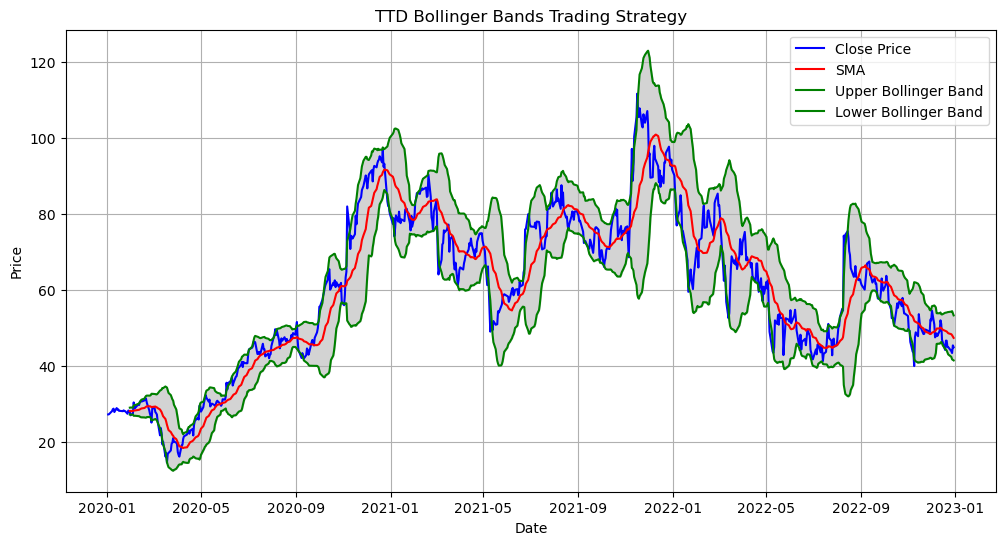

Total Profit: $1.50


In [16]:
# Define the stock symbol and date range
stock_symbol = "TTD"
start_date = "2020-01-01"
end_date = "2023-01-01"

# Download historical stock price data using yfinance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate Bollinger Bands
window = 20
stock_data['SMA'] = stock_data['Close'].rolling(window=window).mean()
stock_data['STD'] = stock_data['Close'].rolling(window=window).std()
stock_data['Upper'] = stock_data['SMA'] + (2 * stock_data['STD'])
stock_data['Lower'] = stock_data['SMA'] - (2 * stock_data['STD'])

# Initialize variables for tracking the trading signals and profit
position = None
capital = 100000  # Starting capital
position_size = 100  # Number of shares to buy/sell

stock_data['Signal'] = 0  # Initialize the signal column
stock_data['Profit'] = 0  # Initialize the profit column

for index, row in stock_data.iterrows():
    if row['Close'] <= row['Lower']:
        if position is None:
            position = capital
            capital -= position_size * row['Close']
            stock_data.at[index, 'Signal'] = 1  # Buy signal

    if row['Close'] >= row['SMA'] and position is not None:
        capital += position_size * row['Close']
        stock_data.at[index, 'Signal'] = -1  # Sell signal
        position = None

stock_data['Profit'] = stock_data['Signal'].shift(1) * (stock_data['Close'] - stock_data['Close'].shift(1))
profit = stock_data['Profit'].sum()

# Plot the Bollinger Bands chart
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='blue')
plt.plot(stock_data.index, stock_data['SMA'], label='SMA', color='red')
plt.plot(stock_data.index, stock_data['Upper'], label='Upper Bollinger Band', color='green')
plt.plot(stock_data.index, stock_data['Lower'], label='Lower Bollinger Band', color='green')
plt.fill_between(stock_data.index, stock_data['Lower'], stock_data['Upper'], color='lightgray')

plt.title(f'{stock_symbol} Bollinger Bands Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()

plt.show()

print(f"Total Profit: ${profit:.2f}")